# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [90]:
import pandas as pd
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [91]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [92]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog which holds a license. The dataset includes information on the dog (like its name, its breed, its color and birth date) - but also on its license (application data / issuance date / expiration date).

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

How many dogs in the dataset are vaccinated? What is the most common primary breed? How old are the dogs in average?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [93]:
df.value_counts('Primary Breed').head(10)

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [94]:
df[df['Primary Breed']!='Unknown'].value_counts('Primary Breed').head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## What are the most popular dog names?

In [95]:
df.value_counts('Animal Name').head(10)

Animal Name
UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [96]:
df[df['Animal Name']=='Sophia'].value_counts('Animal Name') #yes, 12 dogs :O


Animal Name
Sophia    12
Name: count, dtype: int64

In [97]:
df[df['Animal Name']=='Max'].value_counts('Animal Name')

Animal Name
Max    202
Name: count, dtype: int64

In [98]:
df[df['Animal Name']=='Maxwell'].value_counts('Animal Name')

Animal Name
Maxwell    11
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

In [99]:
df.value_counts('Guard or Trained',normalize=True)*100

Guard or Trained
No     99.914254
Yes     0.085746
Name: proportion, dtype: float64

## What are the actual numbers?

In [100]:
df.value_counts('Guard or Trained')

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [101]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [102]:
df['Guard or Trained'].replace(np.nan,'No', inplace=True)
df.value_counts('Guard or Trained')

/var/folders/z0/7y9h036n67l9188jq204ym500000gn/T/ipykernel_2732/1786269678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Guard or Trained'].replace(np.nan,'No', inplace=True)


Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [103]:
df[df['Guard or Trained']=='Yes'].value_counts('Primary Breed')

Primary Breed
Unknown                       5
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
Labrador Retriever            1
Poodle, Standard              1
Rottweiler                    1
Schnauzer, Miniature          1
Shih Tzu                      1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [104]:
df['Animal Birth'] = pd.to_datetime(df['Animal Birth'])
df['Year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [105]:
df['Age'] = 2025 - df['Year']
df['Age'].mean()
# This seems weird. But df.sort_values(by='Age',ascending=False).head(20) shows that the data itself is skrewed.

15.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [106]:
df_zip = pd.read_csv('zipcodes-neighborhoods.csv')
df_zip.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [107]:
df_zip.rename(columns={'zip':'Owner Zip Code'},inplace=True)

In [108]:
df = df.merge(df_zip, left_on='Owner Zip Code', right_on='Owner Zip Code',how='left')

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [109]:
df[df['borough']=='Bronx'].value_counts('Animal Name').head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [110]:
df[(df['borough']=='Brooklyn') & (df['Animal Name']!='Unknown')].value_counts('Animal Name').head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [111]:
df[(df['neighborhood']=='Upper East Side') & (df['Animal Name']!='Unknown')].value_counts('Animal Name').head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [114]:
df[(df['borough']=='Bronx') & (df['Primary Breed']!='Unknown')].value_counts('Primary Breed').head(1)

Primary Breed
Yorkshire Terrier    250
Name: count, dtype: int64

In [115]:
df[(df['borough']=='Brooklyn') & (df['Primary Breed']!='Unknown')].value_counts('Primary Breed').head(1)

Primary Breed
Yorkshire Terrier    501
Name: count, dtype: int64

In [116]:
df[(df['neighborhood']=='Upper East Side') & (df['Primary Breed']!='Unknown')].value_counts('Primary Breed').head(1)

Primary Breed
Havanese    94
Name: count, dtype: int64

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [156]:
df_proportion = df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).rename('Proportion').reset_index()
df_proportion[df_proportion['Spayed or Neut']=='No'].sort_values(by='Proportion',ascending=False)

,Primary Breed,Spayed or Neut,Proportion
275,Mudi,No,1.000000
265,"Mastiff, Tibetan",No,1.000000
160,Dogo Argentino,No,1.000000
398,Treeing Tennessee Brindle,No,1.000000
228,Karelian Bear Dog,No,1.000000
...,...,...,...
240,Labrador Retriever Crossbreed,No,0.042005
407,"Welsh Corgi, Cardigan",No,0.040000
185,German Shepherd Crossbreed,No,0.033241
206,Greyhound,No,0.017857


In [158]:
df_proportion_gen = df.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).rename('Proportion').reset_index()
df_proportion_gen[df_proportion_gen['Spayed or Neut']=='No'].sort_values(by='Proportion',ascending=False)

,Animal Gender,Spayed or Neut,Proportion
4,M,No,0.208144
2,F,No,0.142150


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

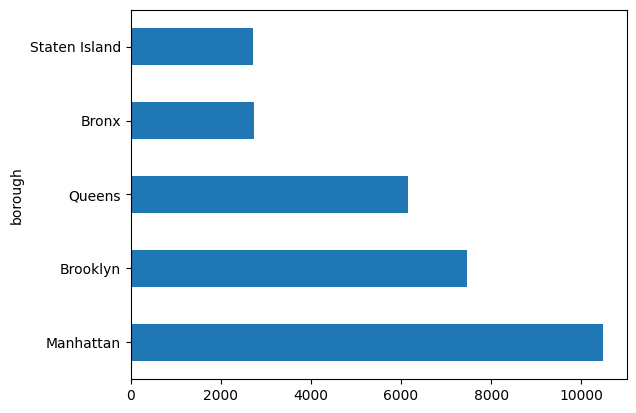

In [166]:
df['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [169]:
df_pop = pd.read_csv('boro_population.csv')
df_pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [186]:
df_boro = df.value_counts('borough').to_frame(name='dog_count')

In [194]:
df_dogpc = df_boro.merge(df_pop, left_on='borough', right_on='borough', how='left')
df_dogpc['dogs_per_capita'] = df_dogpc.apply(lambda row: row['dog_count'] / row['population'],axis=1)
df_dogpc.sort_values(by='dogs_per_capita',ascending=False)

,borough,dog_count,population,area_sqmi,dogs_per_capita
0,Manhattan,10478,1644518,23,0.006371
4,Staten Island,2727,474558,59,0.005746
1,Brooklyn,7466,2636735,71,0.002832
2,Queens,6154,2339150,109,0.002631
3,Bronx,2748,1455444,42,0.001888


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: ylabel='borough,Primary Breed'>

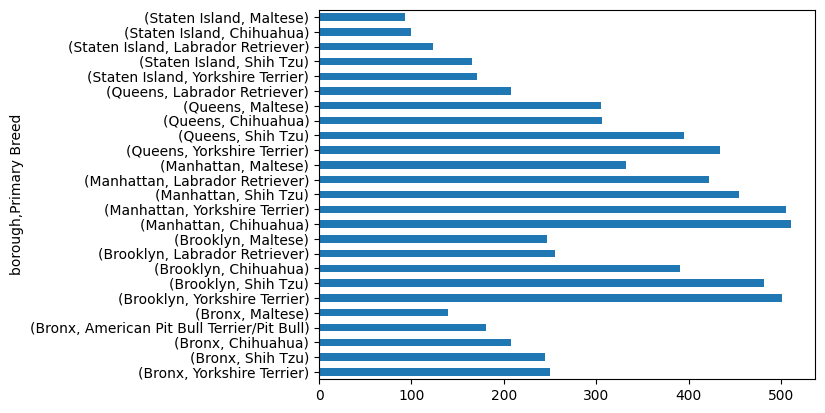

In [256]:
df_grouped = df[df['Primary Breed']!='Unknown']
df_grouped = df_grouped.groupby('borough')['Primary Breed'].value_counts()
df_grouped = df_grouped.groupby('borough',group_keys=False).nlargest(5)
df_grouped.plot(kind='barh',ylabel='borough,Primary Breed')